In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Crear un conjunto de datos de ejemplo
data = {
    'edad': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'género': ['hombre', 'mujer', 'hombre', 'mujer', 'hombre', 'mujer', 'hombre', 'mujer', 'hombre', 'mujer'],
    'salario': [50000, 54000, 58000, 62000, 66000, 70000, 74000, 78000, 82000, 86000]
}
df = pd.DataFrame(data)



In [2]:
# Definir las variables independientes y dependiente
X = df[['edad', 'género']]
y = df['salario']

# Crear un transformador de columnas para aplicar OneHotEncoding a la variable categórica
column_transformer = ColumnTransformer(
    [('category', OneHotEncoder(), ['género'])],
    remainder='passthrough')

# Crear un pipeline que incluye el transformador y el modelo de regresión lineal
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MSE: 0.00
R^2: 1.00


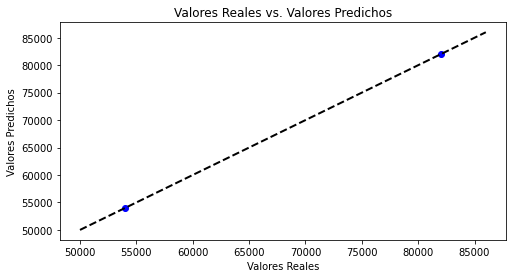

In [3]:
# Ajustar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline.predict(X_test)

# Calcular y mostrar las métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

# Gráfica de valores reales vs. predichos
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

In [4]:
# Asumiendo que el modelo ha sido ajustado como se mostró en el ejemplo anterior
coefs = pipeline.named_steps['regressor'].coef_
intercept = pipeline.named_steps['regressor'].intercept_

# Imprimir los coeficientes y el intercepto
print("Coeficientes:", coefs)
print("Intercepto:", intercept)


Coeficientes: [ 3.59908689e-12 -3.86535248e-12  8.00000000e+02]
Intercepto: 29999.999999999993


In [5]:
# Asumiendo que el modelo ha sido ajustado como se mostró en el ejemplo anterior
coefs = pipeline.named_steps['regressor'].coef_
intercept = pipeline.named_steps['regressor'].intercept_

# Obteniendo nombres de las características después del OneHotEncoder
# Asegúrate de usar get_feature_names_out() si estás usando scikit-learn 0.23 o superior
feature_names = (pipeline.named_steps['preprocessor']
                 .named_transformers_['category']
                 .get_feature_names_out(['género']))  # Modificado para usar get_feature_names_out()

# Agregamos los nombres de las características numéricas
feature_names = np.concatenate([feature_names, ['edad']])

# Imprimir el intercepto y los coeficientes con su interpretación
print(f"Intercepto ({intercept}): Es el salario estimado cuando la edad es 0 y el género no está especificado (o es la categoría base).")

# Iterar sobre los nombres y coeficientes de las características para imprimir su interpretación
for name, coef in zip(feature_names, coefs):
    if 'género' in name:
        gender = name.split('_')[-1]
        print(f"Coeficiente para '{gender}' ({coef}): Indica que el salario aumentará en ${coef:.2f} sobre la base del intercepto si el individuo es {gender}, asumiendo que la edad es cero.")
    else:
        print(f"Coeficiente para '{name}' ({coef}): Por cada año adicional de edad, se espera que el salario aumente en ${coef:.2f}, independientemente del género.")



Intercepto (29999.999999999993): Es el salario estimado cuando la edad es 0 y el género no está especificado (o es la categoría base).
Coeficiente para 'hombre' (3.5990868903021547e-12): Indica que el salario aumentará en $0.00 sobre la base del intercepto si el individuo es hombre, asumiendo que la edad es cero.
Coeficiente para 'mujer' (-3.865352482534945e-12): Indica que el salario aumentará en $-0.00 sobre la base del intercepto si el individuo es mujer, asumiendo que la edad es cero.
Coeficiente para 'edad' (800.0000000000001): Por cada año adicional de edad, se espera que el salario aumente en $800.00, independientemente del género.
